In [24]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy
from scipy.signal import find_peaks

plt.style.use('moje.mplstyle')

In [25]:
UR = np.genfromtxt(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\e-ur.csv', delimiter=',', skip_header=1)

t = UR[: , 0]/1e6
u = UR[: , 1]/30
r = UR[: , 2]/1e3

In [26]:
ABR = np.genfromtxt(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\e-abr.csv', delimiter=',', skip_header=1)

tt = ABR[: , 0]/1e6
a = ABR[: , 1]/1e3
b = ABR[: , 2]/1e3
rr = ABR[: , 3]/1e3

In [27]:
CDR = np.genfromtxt(r'C:\Users\z003zh2j\Desktop\PLOT\eqn\e-cdr.csv', delimiter=',', skip_header=1)

ttt = CDR[: , 0]/1e6
c = CDR[: , 1]/1e3
d = CDR[: , 2]/1e3
rrr = CDR[: , 3]/1e3

In [28]:
try:
  def pnej(seznam):
    points = find_peaks(seznam, distance=100000)
    i = 0
    N = []
    for n in points[0]:
        if seznam[n] > 0:
            if i <= 0:
                i += 1
                N.append(n)
    indexy = N[0]
    return indexy                
except IndexError:
  R, RR, RRR = 50,100,100

R = t[pnej(r)]
RR = tt[pnej(rr)]
RRR = ttt[pnej(rrr)]

def timel(leng,okno,jaky):
    if jaky == "R":
        jaky = R
    elif jaky == "RR":
        jaky = RR
    elif jaky == "RRR":
        jaky = RRR

    N1 = np.linspace(jaky-(-1 * ((leng-1) /2)) * okno , jaky-((leng-1) /2)* okno,leng)
    N2 = np.linspace(-1 * ((leng-1) /2) * okno , ((leng-1) /2) * okno,leng)
    N1 = N1.tolist()
    N1.sort()
    N2 = N2.tolist()
    N2 = ["%.2f" % member for member in N2]

    return(N1,N2)

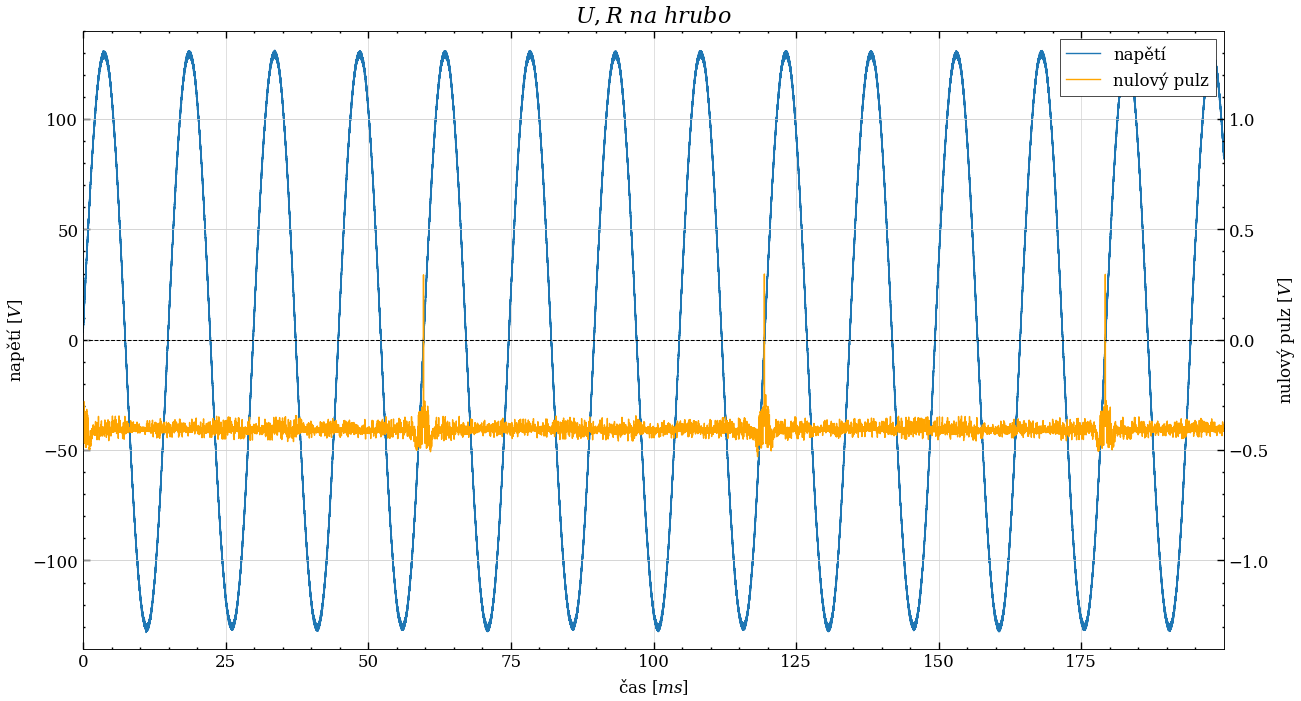

In [29]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax2 = host.twinx()  
host.set_xlim(0, t[-1])
host.set_ylim(-140, 140)
ax2.set_ylim(-1.4, 1.4)

host.set_xlabel("čas $[ms]$", fontsize=12)
host.set_ylabel("napětí $[V]$", fontsize=12)
ax2.set_ylabel("nulový pulz $[V]$", fontsize=12)

p1 = host.plot(t, u, label="napětí")
p2 = ax2.plot(t, r, label="nulový pulz", color='orange')

plt.hlines(0.00075/2,0, t[-1], color = 'k', linestyles='--',lw = 0.75)

# plt.title("U,R na hrubo")
plt.title(r"$U,R$ $na$ $hrubo$", fontsize=16, color='k')
host.legend(handles=p1+p2, loc='upper right')
# host.set_yticks(np.arange(-120, 140, step=40))
host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
# host.grid(color='lightgrey', linestyle='-', linewidth=0.5)
host.set_xlabel("čas $[ms]$", fontsize=12, color = 'k')
host.set_ylabel("napětí $[V]$", fontsize=12, color = 'k')
ax2.set_ylabel("nulový pulz $[V]$", fontsize=12, color = 'k')
# ax = plt.gca()
# ax.spines['bottom'].set_color('k')
# ax.spines['top'].set_color('k') 
# ax.spines['right'].set_color(p2[0].get_color())
# ax.spines['left'].set_color(p1[0].get_color())

plt.show()

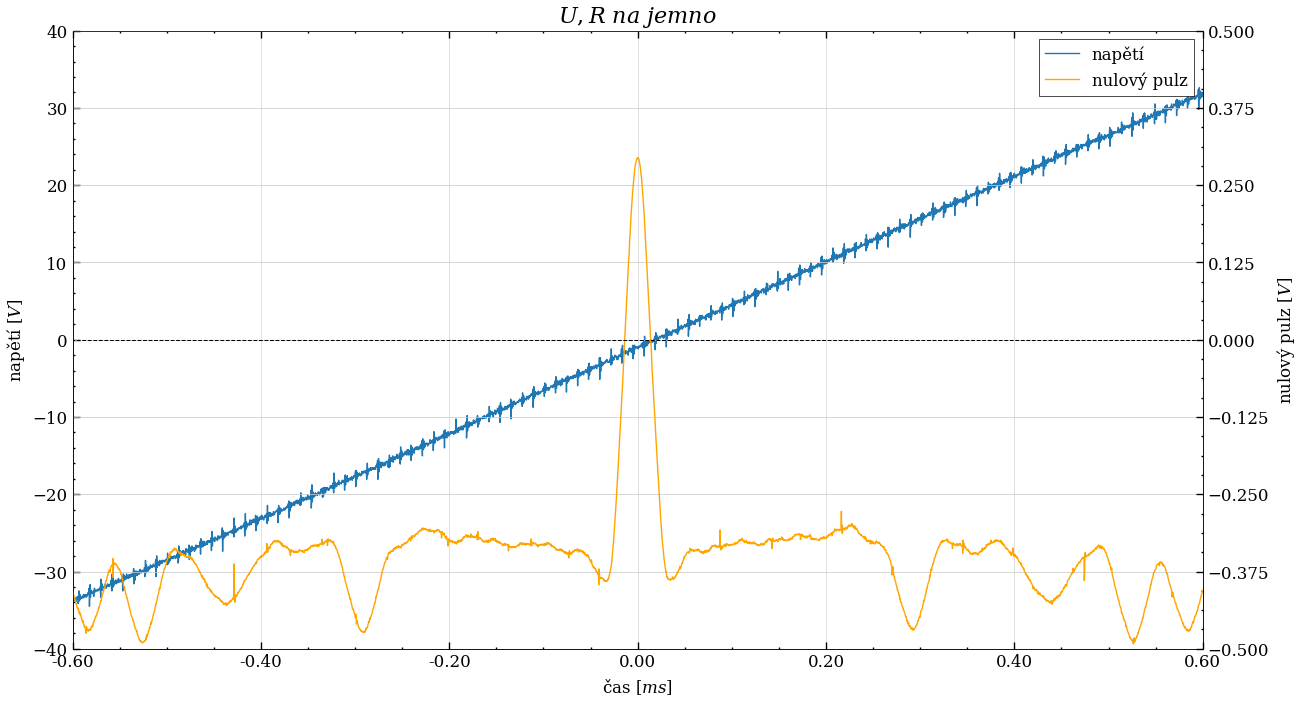

In [30]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax2 = host.twinx()
ax = plt.gca()
    
host.set_xlim(R-0.6, R+0.6)
host.set_ylim(-40, 40)
ax2.set_ylim(-0.5, 0.5)

p1 = host.plot(t, u, label="napětí")
p2 = ax2.plot(t, r, label="nulový pulz", color='orange')
ax2.set_yticks(np.arange(-0.5, 0.5+0.5/4, step=0.5/4))
plt.hlines(0,0,t[-1],color = 'k', linestyles='--',lw = 0.75)
plt.title("$U,R$ $na$ $jemno$", fontsize=16, color='k')
host.legend(handles=p1+p2, loc='upper right')
host.set_yticks(np.arange(-40, 50, step=10))
host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())


# ax.set_xticks([R,R-0.2,R+0.2,R-0.4,R+0.4,R-0.6,R+0.6]) 
# ax.set_xticklabels(['0',"-0.2","0.2","-0.4","0.4","-0.6","0.6"])
N1 , N2 = timel(7,0.2,"R")
ax.set_xticks(N1) 
ax.set_xticklabels(N2)
host.set_xlabel("čas $[ms]$", fontsize=12, color = 'k')
host.set_ylabel("napětí $[V]$", fontsize=12, color = 'k')
ax2.set_ylabel("nulový pulz $[V]$", fontsize=12, color = 'k')

# plt.show()
plt.savefig("ur.png")

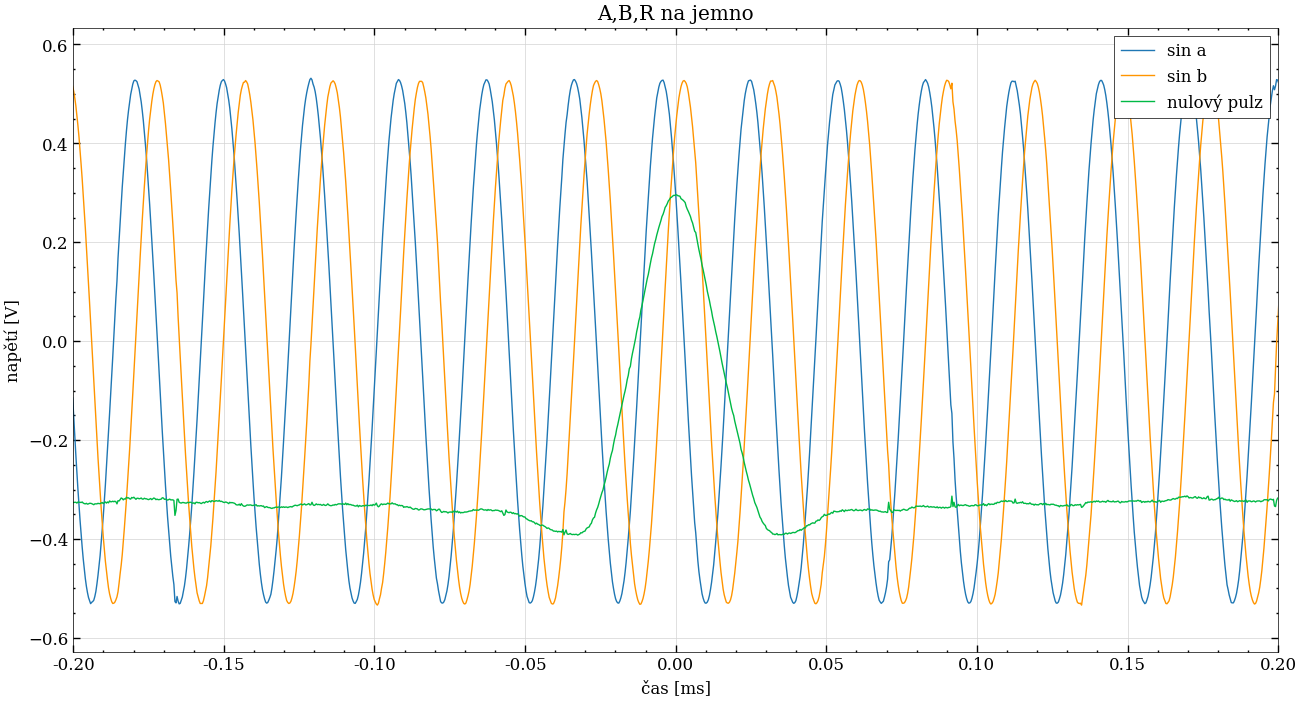

In [31]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax = plt.gca()
plt.title("A,B,R na jemno")
p1 = plt.plot(tt,a, label="sin a")
p2 = plt.plot(tt,b, label="sin b")
p3 = plt.plot(tt,rr, label="nulový pulz")
plt.xlim(RR-0.2,RR+0.2)
host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
host.legend(handles=p1+p2+p3, loc='upper right')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# # plt.show()
N1 , N2 = timel(9,0.05,"RR")
# ax.set_xticks([RR,RR-0.2,RR+0.2,RR-0.1,RR+0.1])#,RR-0.4,RR+0.4,RR-0.6,RR+0.6]) 
# ax.set_xticklabels(['0',"-0.2","0.2","-0.1","0.1"])#,"-0.4","+0.4","-0.6","+0.6"])
ax.set_xticks(N1) 
ax.set_xticklabels(N2)

# plt.show()
plt.savefig("abr.png")

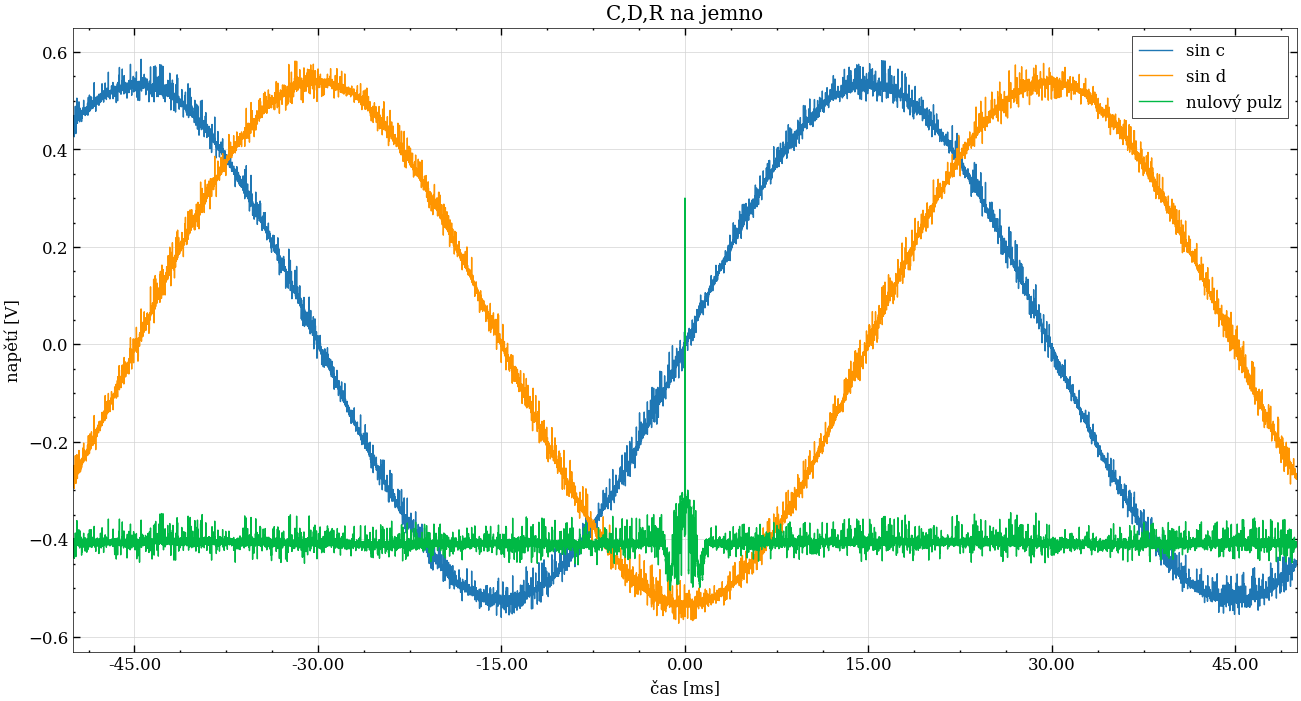

In [32]:
fig, host = plt.subplots(figsize=(13,7), layout='constrained')
ax = plt.gca()
plt.title("C,D,R na jemno")
p1 = plt.plot(ttt,c, label="sin c")
p2 = plt.plot(ttt,d, label="sin d")
p3 = plt.plot(ttt,rrr, label="nulový pulz")
host.set_xlabel("čas [ms]")
host.set_ylabel("napětí [V]")
host.legend(handles=p1+p2+p3, loc='upper right')
plt.xlim(RRR-50,RRR+50)

# ax.set_xticks([RRR,RRR-15,RRR+15,RRR-30,RRR+30,RRR-45,RRR+45])
# ax.set_xticklabels(['0',"-15","15","-30","30","-45","45"])
N1 , N2 = timel(7,15,"RRR")
ax.set_xticks(N1) 
ax.set_xticklabels(N2)

plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
# plt.show()
plt.savefig("cdr.png")